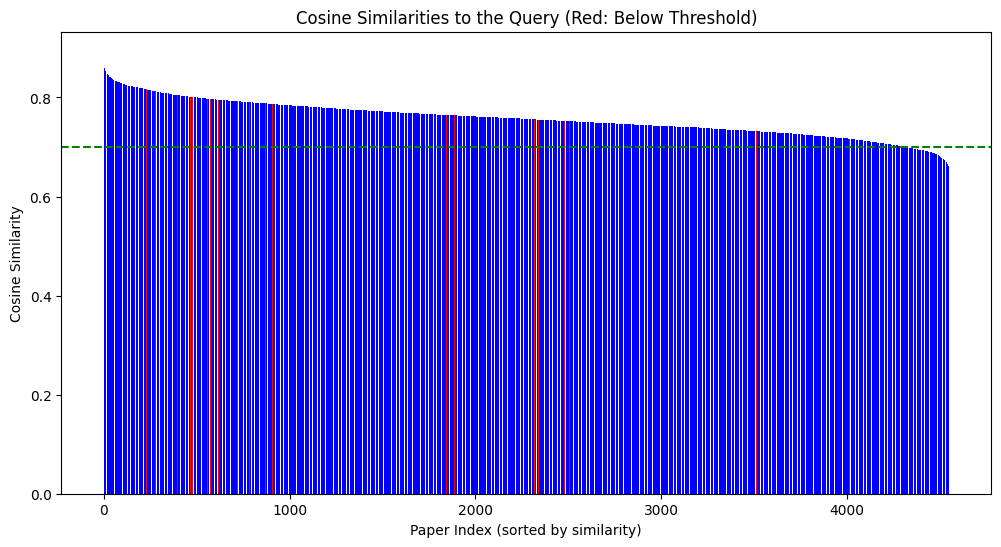

Documents with similarity below 0.7:
The Witch: A New England Folk Tale
Symmetrical Absence/Symmetrical Absurdity: Critical Notes on the Production of Actor-Network Accounts
Path Planning and Control of a UAV Fleet in Bridge Management Systems
Cases in Human Resource Management in Hospitality
Socialist patriotism, racism and antisemitism in the early Swedish labour movement
The potentials of Enlightenment
Validation of Land-Surface Processes in AMIP Models: A Pilot Study I Model Diagnosis and Intercomparison
Synlighet, status och strategisk skillnad? Attityder till slöjan efter den 11 september
Mi'kmaq Textiles Twining Rush and Other Fibres BkCp-1 Site Pictou NS (Curatorial Report #82)
The SuperCam Remote Sensing Instrument Suite for Mars 2020
I, Robot: You Gotta Have Heart
A Grammar of the Natural Law: A Celebration of Josef Fuchs and His Legacy for Natural Law Renewal
Economic survey of India, its states : 2012-13 : an exhaustive survey of economic characteristics, economic policies 

In [3]:
import os
import matplotlib.pyplot as plt
from pymongo import MongoClient
from dotenv import load_dotenv
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import OpenAIEmbeddings

# Load environment variables
dotenv_path = r'C:\Users\Soko\Documents\GitHub\VUACode\.env'
load_dotenv(dotenv_path)
mongodb_uri = os.getenv('MONGODB_URI')

# Connect to MongoDB
client = MongoClient(mongodb_uri)
db = client['twinning_papers']  # Replace with your database name
collection = db['papers']  # Replace with your collection name

# Initialize OpenAI Embeddings
embeddings = OpenAIEmbeddings(disallowed_special=())
# Compute cosine similarity
def compute_similarity(query_embedding, document_embeddings):
    similarities = cosine_similarity([query_embedding], document_embeddings)[0]
    return similarities

# Function to get valid embeddings and titles from MongoDB
def get_valid_embeddings_and_titles():
    papers = collection.find({}, {"embedding": 1, "title": 1})
    return [(paper['embedding'], paper.get('title', 'No Title'))
            for paper in papers if 'embedding' in paper and isinstance(paper['embedding'], list) and len(paper['embedding']) == 1536]

query = "What are the main factors causing heritability in DZ twins?"
query_embedding = embeddings.embed_documents([query])[0]

# Retrieve valid embeddings and titles, and compute similarities
documents = get_valid_embeddings_and_titles()
if not documents:
    raise ValueError("No valid embeddings found in the database.")

document_embeddings, document_titles = zip(*documents)
similarities = compute_similarity(query_embedding, document_embeddings)

# Identifying documents with similarity below the threshold
threshold = 0.7
low_similarity_titles = [title for title, similarity in zip(document_titles, similarities) if similarity < threshold]

# Visualization with threshold indication
plt.figure(figsize=(12, 6))
colors = ['red' if sim < threshold else 'blue' for sim in similarities]
plt.bar(range(len(similarities)), sorted(similarities, reverse=True), color=colors)
plt.axhline(y=threshold, color='green', linestyle='--')
plt.xlabel('Paper Index (sorted by similarity)')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarities to the Query (Red: Below Threshold)')
plt.show()

# Print titles of low similarity documents
print("Documents with similarity below 0.7:")
for title in low_similarity_titles:
    print(title)